# No-glue-code

In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Cambdrige`


In [2]:
# The statistical inference frame-work we will use
using LogDensityProblems
using LogDensityProblemsAD
using DynamicPPL
using ForwardDiff
using Random
using LinearAlgebra

#Plotting
using PyPlot

#What we are tweaking
using Revise
using AdvancedHMC
using Turing

[ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



## Model

In [3]:
# Just a simple Neal Funnel
d = 21
@model function funnel()
    θ ~ Normal(0, 3)
    z ~ MvNormal(zeros(d-1), exp(θ)*I)
    x ~ MvNormal(z, I)
end

funnel (generic function with 2 methods)

In [4]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

Model{typeof(funnel), (), (), (), Tuple{}, Tuple{}, ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DefaultContext}}(funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [1.2142074831535152, 1.23371919965455, -0.8480146960461767, 0.1600994648479841, 1.9180385508479283, -3.401523464506408, -0.0957684186471088, 0.6734622629464286, -3.2749467689509633, -1.6760091758453226, 1.9567202902549736, 0.1136169088905351, 0.11117896909388916, -0.5373922347882832, -0.12436857036298687, -1.2901071061088532, 1.702584517514787, -0.44460133117954226, 1.0818722439221686, 1.2208011493237483],), DefaultContext()))

## Sampling

In [11]:
using MCMCChains

nadapts=500 
TAP=0.95
nuts = AdvancedHMC.NUTS(nadapts, TAP; init_ϵ=0.1)

NUTS(500, 0.95, 10, 1000.0, 0.1, nothing, Leapfrog, AdvancedHMC.NUTS_kernel{MultinomialTS, GeneralisedNoUTurn}, AdvancedHMC.var"#adaptor#38"{Float64}(0.95))

In [12]:
Asamples = sample(funnel_model, nuts, 5000; chain_type=MCMCChains.Chains)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03


Chains MCMC chain (5000×34×1 Array{Real, 3}):

Iterations        = 1:1:5000
Number of chains  = 1
Samples per chain = 5000
parameters        = θ, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12, z13, z14, z15, z16, z17, z18, z19, z20
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, is_adapt

Summary Statistics
  parameters      mean       std      mcse    ess_bulk      rhat   ess_per_sec ⋯
      Symbol   Float64   Float64   Float64        Real   Float64       Missing ⋯

           θ   -0.1245    1.0501    0.1363    159.9420    1.0123       missing ⋯
          z1    0.6028    0.7378    0.0177   1736.2126    1.0017       missing ⋯
          z2    0.6061    0.7430    0.0174   1793.1890    1.0015       missing ⋯
          z3   -0.4356    0.7286    0.0113   4746.5545    1.0012       missing ⋯
          z4    0.0796    0.6841    0.0067 

┌ Warning: Tail ESS calculation failed: OverflowError("4750 * 4503599627370496 overflowed for type Int64")
└ @ MCMCChains ~/.julia/packages/MCMCChains/OVsxE/src/stats.jl:319


### Plotting

In [13]:
theta_mchmc = Vector(Asamples["θ"][:, 1])
x10_mchmc =Vector(Asamples["z10"][:, 1]);

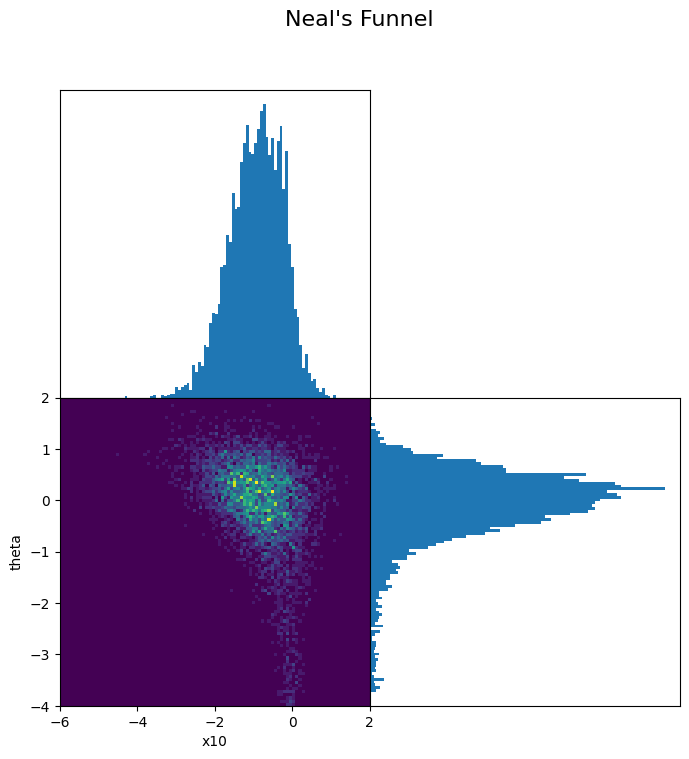

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("Neal's Funnel", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_mchmc, bins=100, range=[-6,2])
axis[1,1].set_yticks([])

axis[2,2].hist(theta_mchmc, bins=100, orientation="horizontal", range=[-4, 2])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10_mchmc, theta_mchmc, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta");

## Sampling w Turing

In [ ]:
using Turing

In [ ]:
TAP = 0.95
nadapts = 300
spl = Turing.NUTS(nadapts, TAP)

In [ ]:
Turing.sample(funnel_model, spl, 50_000, progress=true; save_state=true)